<a href="https://colab.research.google.com/github/cesargar1507/DatasetsUB/blob/main/M6_AI1_GarciaCesar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

In [80]:
!pip install catboost
from catboost import CatBoostRegressor, Pool

In [81]:
ruta = "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/act2_IMDb%20movies_ml.csv"
df = pd.read_csv(ruta,sep=";")

In [82]:
df.head(5)

,imdb_title_id,original_title,year,genre,duration,country,director,actors,avg_vote,votes,avg_vote_weighted,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics
0,tt0010323,Das Cabinet des Dr. Caligari,1920,"Fantasy, Horror, Mystery",76,Germany,Robert Wiene,Werner Krauss,8.1,55601,7.99,$ 18000,$ 8811,237,160
1,tt0012190,The Four Horsemen of the Apocalypse,1921,"Drama, Romance, War",150,USA,Rex Ingram,Pomeroy Cannon,7.2,3058,6.61,$ 800000,$ 9183673,45,16
2,tt0014624,A Woman of Paris: A Drama of Fate,1923,"Drama, Romance",82,USA,Charles Chaplin,Edna Purviance,7.0,4735,6.61,$ 351000,$ 11233,37,24
3,tt0015864,The Gold Rush,1925,"Adventure, Comedy, Drama",95,USA,Charles Chaplin,Charles Chaplin,8.2,97480,8.13,$ 923000,$ 26916,190,125
4,tt0018455,Sunrise: A Song of Two Humans,1927,"Drama, Romance",94,USA,F.W. Murnau,George O'Brien,8.1,46069,7.97,$ 200000,$ 121107,250,186


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8664 entries, 0 to 8663
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          8664 non-null   object 
 1   original_title         8664 non-null   object 
 2   year                   8664 non-null   int64  
 3   genre                  8664 non-null   object 
 4   duration               8664 non-null   int64  
 5   country                8664 non-null   object 
 6   director               8664 non-null   object 
 7   actors                 8664 non-null   object 
 8   avg_vote               8664 non-null   float64
 9   votes                  8664 non-null   int64  
 10  avg_vote_weighted      8664 non-null   float64
 11  budget                 8664 non-null   object 
 12  worlwide_gross_income  8664 non-null   object 
 13  reviews_from_users     8664 non-null   int64  
 14  reviews_from_critics   8664 non-null   int64  
dtypes: f

In [84]:
# Eliminar el símbolo de dólar y convertir a enteros
df['budget'] = df['budget'].replace('[\$,]', '', regex=True).astype(float)
df['worlwide_gross_income'] = df['worlwide_gross_income'].replace('[\$,]', '', regex=True).astype(float)
df_copy = df.copy()

In [85]:
# Convertir las variables categóricas en numéricas usando One-Hot Encoding
df = pd.get_dummies(df, columns=['genre', 'country', 'director', 'actors'])
# Cambiar valores booleanos a enteros en el DataFrame
df = df.astype(int, errors='ignore')

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Seleccionar las características (variables independientes) y la etiqueta (variable dependiente)
# Tarea: Estimación de la recaudación
X = df[['duration', 'budget'] + [col for col in df.columns if col.startswith('genre_') or col.startswith('country_') or col.startswith('director_') or col.startswith('actors_')]]
y = df['worlwide_gross_income']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [87]:
md_list = []
score_train_list = []
score_test_list = []
mse_train_list = []
mse_test_list = []


for maxdepth in list(range(1,10)):
  model = DecisionTreeRegressor(random_state=0, max_depth=maxdepth)
  model.fit(X_train, y_train)

  pred_train = model.predict(X_train)
  pred_test = model.predict(X_test)

  ## Generación de listas
  md_list.append(maxdepth)
  score_train_list.append(100.0*model.score(X_train, y_train))
  score_test_list.append(100.0*model.score(X_test, y_test))
  mse_train_list.append(mean_squared_error(y_train, pred_train))
  mse_test_list.append(mean_squared_error(y_test, pred_test))

datos_modelo = pd.DataFrame({"max_depth":md_list,
                   "score_train":score_train_list,
                   "score_test":score_test_list,
                   "mse_train":mse_train_list,
                   "mse_test":mse_test_list
                   })

In [88]:
datos_modelo.set_index("max_depth", inplace=True)

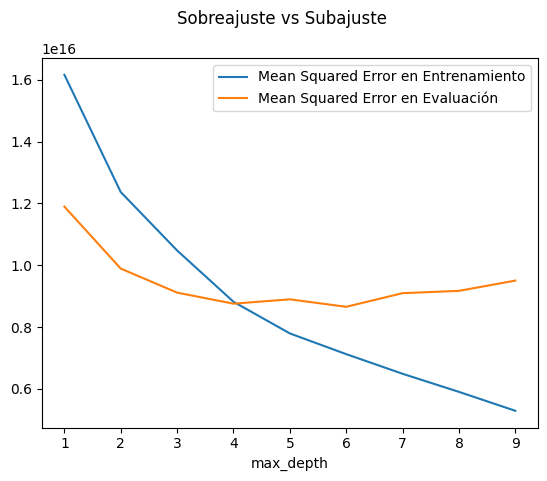

In [89]:
datos_modelo["mse_train"].plot(label="Mean Squared Error en Entrenamiento")
datos_modelo["mse_test"].plot(label="Mean Squared Error en Evaluación")
plt.suptitle("Sobreajuste vs Subajuste")
plt.legend()
plt.show();

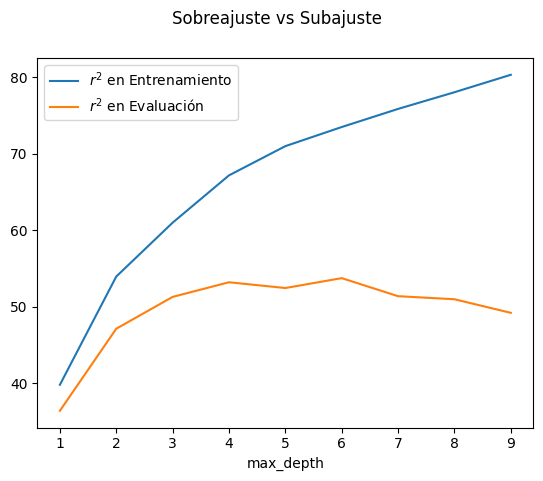

In [90]:
datos_modelo["score_train"].plot(label="$r^2$ en Entrenamiento")
datos_modelo["score_test"].plot(label="$r^2$ en Evaluación")
plt.suptitle("Sobreajuste vs Subajuste")
plt.legend()
plt.show();

In [91]:
# Definir la rejilla de parámetros a probar
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2']
}

# Crear el modelo de árbol de decisión
model = DecisionTreeRegressor(random_state=42)

# Configurar la búsqueda de rejilla
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')

# Ajustar el modelo usando GridSearchCV
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros y el mejor score
print(f"Mejores hiperparámetros: {grid_search.best_params_}")
print(f"Mejor R2 score: {grid_search.best_score_}")

Mejores hiperparámetros: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Mejor R2 score: 0.5584974341864969


In [95]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Seleccionar las características (variables independientes) y la etiqueta (variable dependiente)
# Tarea: Estimación de la recaudación
X = df[['duration', 'budget'] + [col for col in df.columns if col.startswith('genre_') or col.startswith('country_') or col.startswith('director_') or col.startswith('actors_')]]
y = df['worlwide_gross_income']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de árbol de decisión
model = DecisionTreeRegressor(random_state=42, max_depth = 4, max_features = None, min_samples_leaf = 5, min_samples_split = 2)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Estimación de la recaudación - MSE: {mse}, R2: {r2}")

Estimación de la recaudación - MSE: 9164146543120230.0, R2: 0.5101457463227099


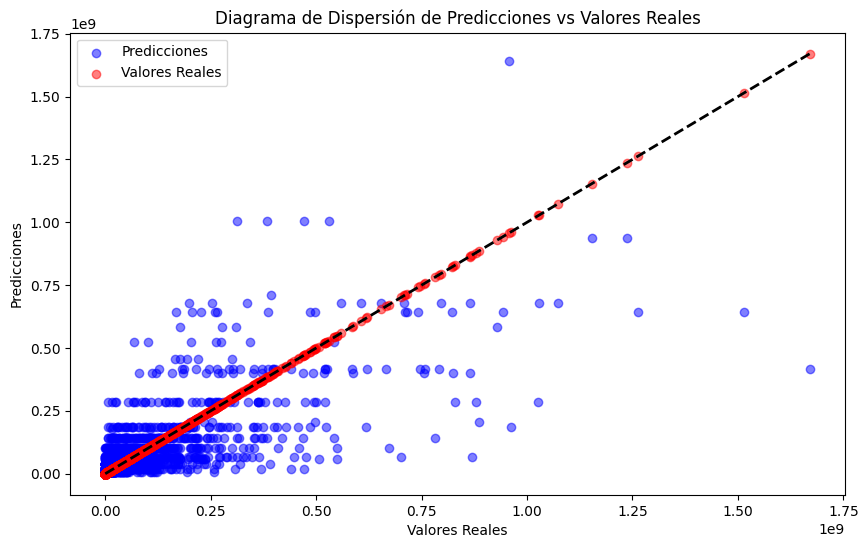

In [93]:
import matplotlib.pyplot as plt

# Crear un diagrama de dispersión de predicciones vs valores reales
plt.figure(figsize=(10, 6))

# Dibujar las predicciones en azul
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicciones')

# Dibujar los valores reales en rojo
plt.scatter(y_test, y_test, color='red', alpha=0.5, label='Valores Reales')

# Agregar leyenda
plt.legend()

# Añadir línea diagonal
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Etiquetas y título
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Diagrama de Dispersión de Predicciones vs Valores Reales')

# Mostrar gráfico
plt.show()

In [94]:
# Identificar las columnas categóricas
categorical_features = ['genre', 'country', 'director', 'actors']

# Crear y preparar el dataset
X = df_copy[['duration', 'budget'] + categorical_features]
y = df_copy['worlwide_gross_income']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de CatBoost
train_pool = Pool(X_train, y_train, cat_features=categorical_features)
test_pool = Pool(X_test, y_test, cat_features=categorical_features)

model = CatBoostRegressor(random_seed=42, logging_level='Silent')
model.fit(train_pool)

# Realizar predicciones
y_pred = model.predict(test_pool)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Estimación de la recaudación - MSE: {mse}, R2: {r2}")

Estimación de la recaudación - MSE: 7590666345601426.0, R2: 0.5942535204842014
